# Introducción a la Programación Científica con Python  #

Python es un lenguaje computacional de alto nivel que permite al investigador realizar con mucha facilidad las actividades comunmente requeridas en la práctica de la ingeniería. Labores como la simulación, carga y manipulación de datos, y la visualización son naturales; y el lenguaje cuenta con gran cantidad de librerías que han sido desarrolladas, depuradas y optimizadas por una comunidad muy colaborativa.  

Este último aspecto es muy importante. En la práctica la idea es utilizar las colecciones de algoritmos correspondientes a los métodos numéricos clásicos (y más sofísticados) que se encuentran disponibles. La idea no es reinventar la rueda, implementando algoritmos de ajuste o solución de ecuaciones, sino utilizar los que ya están disponibles.  

Otra ventaja es que se pueden utilizar los Jupyter Notebooks (como este) para combinar código, resultados y documentación de manera que se conviente en una poderosa herramienta de comunicación.

A lo largo del semestres utilizaremos esencialmente las siguientes herramientas:

* *Python*: lenguage genérico de programación.
* *Jupyter Notebook*: ambiente de computación interactivo y de comunicación.
* *Numpy*: provee arreglos numericos (al estilo de Matlab) y es la base de muchas de las herramientas de computación científica.
* *Scipy*: colección de rutinas de procesamiento de alto nivel. Optimización, regresiones, interpolación, etc.
* *Matplotlib*: herramientas de graficación y visualización.

Vamos a comenzar explorando las herramientas con un sencillo método para el cálculo de Pi.

In [68]:
# Comenzamos invocando numpy y algunos componentes de matplotlib.
# Noten que estos son comentarios en un segmento de código.

%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [5]:
# Definimos una función, para tener más orden
def coord_aleat(N):
    xcoord = 2*(np.random.rand(N))-1
    ycoord = 2*(np.random.rand(N))-1
    return xcoord, ycoord

In [69]:
Ndatos = 1000
radio = 1
xc, yc = coord_aleat(Ndatos)

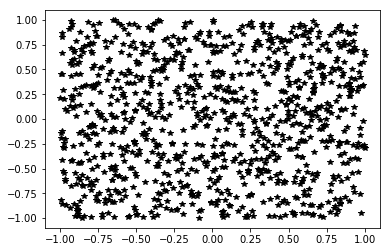

In [71]:
plt.plot(xc,yc,'*k')

In [74]:
posicion = [(xc**2 + yc**2 - radio**2) <= 0]

In [75]:
posicion

[array([ True,  True,  True, False,  True,  True,  True, False, False,
         True,  True,  True, False,  True,  True, False,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, False,
        False,  True,  True,  True,  True,  True,  True, False, False,
         True, False,  True, False,  True,  True,  True,  True,  True,
        False,  True,  True,  True, False,  True, False,  True,  True,
         True, False,  True,  True, False,  True,  True,  True,  True,
         True,  True,  True,  True, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False,  True,
         True,  True,  True, False,  True,  True, False,  True,  True,
         True,  True,  True,  True,  True, False,  True,  True, False,
         True, False,  True,  True, False,  True,  True, False,  True,
         True, False,  True,  True, False,  True, False, False,  True,
         True,  True, False,  True,  True,  True,  True,  True, False,
      

In [76]:
dentro = np.sum(posicion)

In [77]:
dentro

760

In [26]:
proba = dentro/Ndatos

In [28]:
proba*4

3.2240000000000002

In [45]:
# Ahora pongamos todo en una función para poder estudiar el
# efecto del número de datos.

def pi_estad(N):
    radio = 1
    xcoord, ycoord = coord_aleat(N)
    posicion = [(xcoord**2 + ycoord**2 - radio**1) <= 0]
    dentro = np.sum(posicion)
    return dentro/N - np.pi/4

In [78]:
Ndatos = np.logspace(1,8,8)

In [79]:
Ndatos

array([  1.00000000e+01,   1.00000000e+02,   1.00000000e+03,
         1.00000000e+04,   1.00000000e+05,   1.00000000e+06,
         1.00000000e+07,   1.00000000e+08])

In [80]:
pis = []
for n in Ndatos:
    pi_calc = pi_estad(int(n))
    pis.append(pi_estad(n))

C:\Users\andres\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
C:\Users\andres\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


In [61]:
pis

[-0.085398163397448323,
 -0.02539816339744827,
 0.0046018366025517565,
 0.0040018366025517116,
 0.0031018366025516997,
 0.00015183660255169151,
 -0.00026366339744832157,
 -6.8923397448239498e-05]

PermissionError: [Errno 13] Permission denied: './ejemplo.jpg'

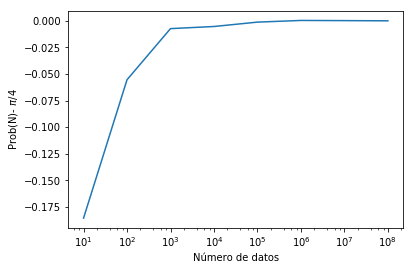

In [84]:
plt.semilogx(Ndatos,pis)
plt.xlabel('Número de datos')
plt.ylabel('Prob(N)- $\pi/4$')
pylab.savefig('./ejemplo.jpg')